In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from scipy import stats
from scipy.stats import boxcox
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [2]:
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.metrics import mean_squared_error

In [5]:
series = airlines_passengers["Count"]

<b> Stationary time series</b>
ARIMA

In [6]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [7]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


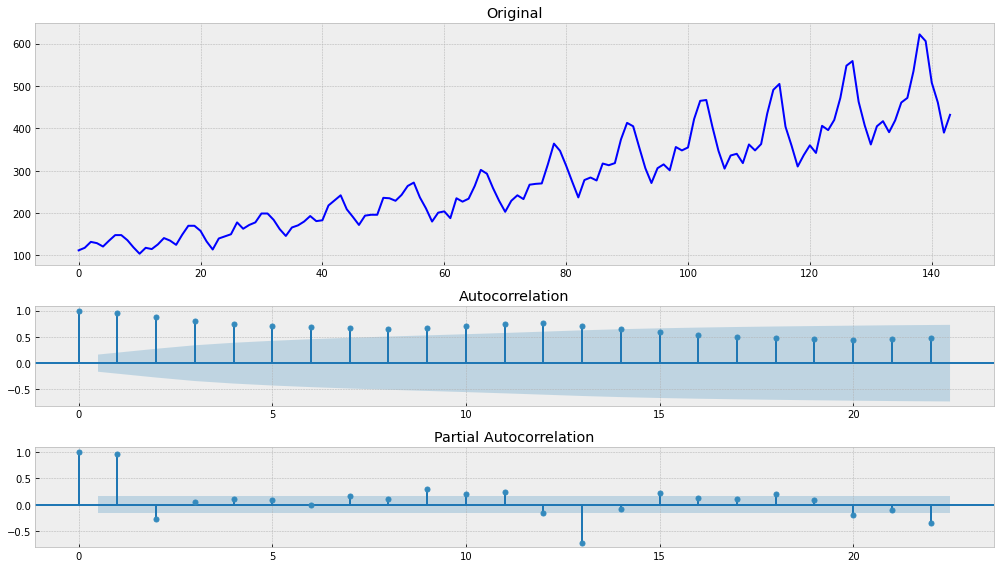

In [8]:
tsplot(series)

In [9]:
series_1, l = stats.boxcox(series)

In [10]:
series_1_1 = series_1[1:] - series_1[:-1]

Results of Dickey-Fuller Test:
Test Statistic                  -2.871708
p-value                          0.048738
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


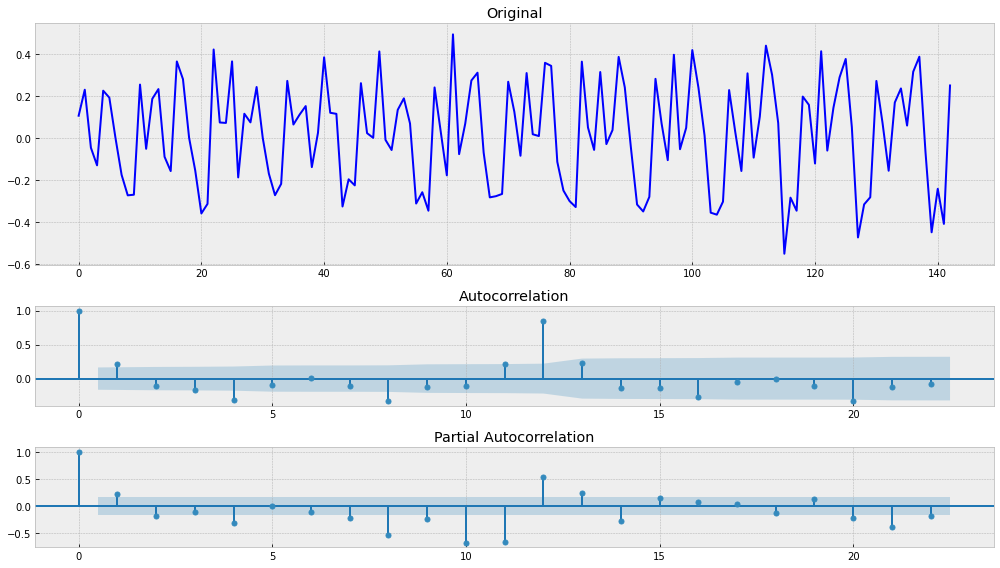

In [11]:
tsplot(series_1_1)

In [12]:
series_ = pd.Series(series_1_1)

In [13]:
series_.count()

143

In [14]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


model_1 = ARIMA(series_, order=(5, 0, 2))
model_1_fit = model_1.fit(method='mle', trend='nc')

C:\Users\79653\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [15]:
model_1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:                     ARMA(5, 2)   Log Likelihood                  17.839
Method:                           mle   S.D. of innovations              0.213
Date:                Sat, 27 May 2023   AIC                            -19.678
Time:                        20:45:30   BIC                              4.025
Sample:                             0   HQIC                           -10.046
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.1430      0.172      0.831      0.406      -0.194       0.480
ar.L2.y        0.3535      0.144      2.455      0.014       0.071       0.636
ar.L3.y       -0.1694      0.104     -1.635      0.102      -0.373       0.034
ar.L4.y       -0.2429      0.093     -2.613      0.009      -0.425      -0.061
ar.L5.y       -0.0128      0.109     -0.118      0.906      -0.227       0.201
ma.L1.y        0.0374      0.151      0.247      0.805      -0.259       0.334
ma.L2.y       -0.6498      0.111     -5.849      0.000      -0.867      -0.432
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0140           -0.7624j            1.2686           -0.1026
AR.2            1.0140           +0.7624j            1.2686            0.1026
AR.3           -1.4191           -0.8119j            1.6349           -0.4173
AR.4           -1.4191           +0.8119j            1.6349            0.4173
AR.5          -18.0943           -0.0000j           18.0943           -0.5000
MA.1           -1.2121           +0.0000j            1.2121            0.5000
MA.2            1.2697           +0.0000j            1.2697            0.0000
-----------------------------------------------------------------------------
"""

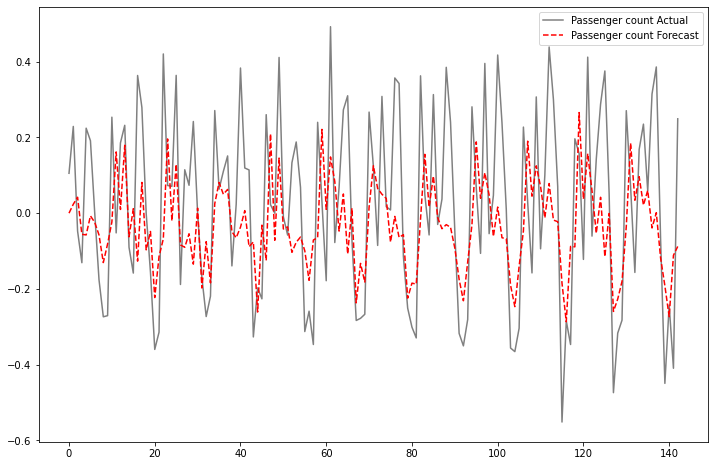

In [20]:
fig = plt.figure()
actual_1, = plt.plot(series_, 'grey', label='Passenger count Actual')
forecast_1, = plt.plot(model_1_fit.fittedvalues, 'red', label='Passenger count Forecast', linestyle='dashed')
plt.legend(handles=[actual_1, forecast_1])
plt.rcParams["figure.figsize"] = (12,8)
plt.show()